In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [2]:
data = pd.read_csv("tcav_results/seeded_test/980_results.csv")
# exclude index dimension
data = data.drop(columns=["id"])

# Concatenate both dataframes
data = pd.concat([data, data_copy])

In [3]:

results_list = []
for t in data["t"].unique():
    for layer in data["layer"].unique():
        # get data for t and layer
        data_t_layer = data[(data["t"] == t) & (data["layer"] == layer)]
        mean_accuracy = data_t_layer["accuracy"].mean().item()
        results_list.append([t, layer, mean_accuracy])

results = pd.DataFrame(results_list, columns=["t", "layer", "accuracy"])
results.drop(columns=["layer"]).groupby("t").mean()


,accuracy
t,
1,0.857143
100,0.821429
200,0.885714
300,0.785714
400,0.689286
500,0.703571
600,0.621429
700,0.632143
800,0.514286


Text(0.5, 0, 'accuracy')

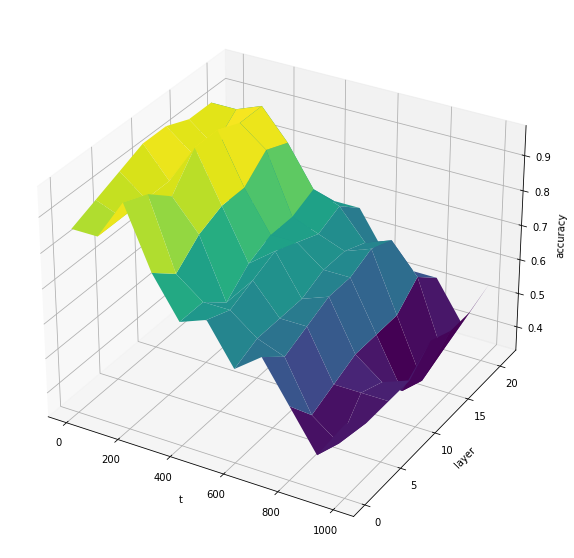

In [13]:
# 3d surface plot
fig = plt.figure( figsize=(10, 10) )
ax = fig.add_subplot(111, projection="3d")
# axes = plt.axes(projection="3d")
# X, Y, Z = axes3d.get_test_data(0.05)
# Z.shape
Y, X = np.meshgrid(data["layer"].unique(), data["t"].unique())

Z = results["accuracy"].values.reshape(X.shape)
# Z = Z*0
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("t")
ax.set_ylabel("layer")
ax.set_zlabel("accuracy")




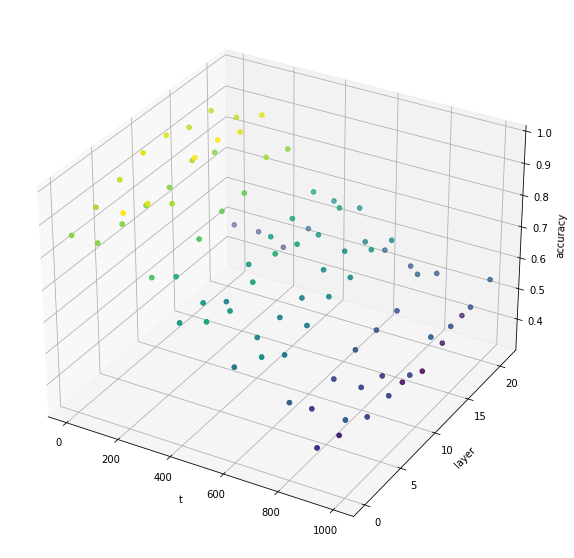

In [6]:
# scatter 3d
fig = plt.figure( figsize=(10, 10) )
ax = fig.add_subplot(111, projection="3d")
# Set labels
ax.set_xlabel("t")
ax.set_ylabel("layer")
ax.set_zlabel("accuracy")

ax.scatter(data["t"], data["layer"], data["accuracy"], c=data["accuracy"], cmap="viridis")